# Maternal Health Risk Prediction

Dataset Description:

This dataset contains few attributes that can lead us to determine if a patient is at risk on maternal health.

Data has been collected from different hospitals, community clinics, maternal health cares from the rural areas of Bangladesh through the IoT based risk monitoring system.

Following are the attributes

Age,
SystolicBP,
DiastolicBP,
BS,
HeartRate,
Risk Level.

There are more than 1000 istances and three levels of predicted risk intensities(Low,Mid and High)

Source of dataset: 
UCI Machine Learning Repository(https://archive.ics.uci.edu/ml/datasets/Maternal+Health+Risk+Data+Set)

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
np.random.seed(1)

**Load data**

In [3]:
md=pd.read_csv("./Maternal Health Risk Data Set.csv")

**Dataset Exploring**

In [4]:
md.head(3)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk


In [5]:
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [6]:
md.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [7]:
#checking if there are any null values
md.isna().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [8]:
#getting list of Categorical Variables
cat_var_list = list(md.select_dtypes(include='object').columns)
cat_var_list

['RiskLevel']

In [9]:
#checking for unique values in each column
for cat in cat_var_list: 
    print(f"Category: {cat} Values: {md[cat].unique()}")

Category: RiskLevel Values: ['high risk' 'low risk' 'mid risk']


In [10]:
#Instead of label encoding, here replacing the categroical to numeric since label encoding assigns values in reverse order
#like low risk-1,high risk-0 which is confusing
label_mapping = {"low risk": 0, "mid risk": 1, "high risk": 2}
md = md.replace({"RiskLevel": label_mapping})

In [11]:
md.head(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,2
1,35,140,90,13.00,98.0,70,2
2,29,90,70,8.00,100.0,80,2
3,30,140,85,7.00,98.0,70,2
4,35,120,60,6.10,98.0,76,0
5,23,140,80,7.01,98.0,70,2
6,23,130,70,7.01,98.0,78,1
7,35,85,60,11.00,102.0,86,2
8,32,120,90,6.90,98.0,70,1
9,42,130,80,18.00,98.0,70,2


**Split Data**

In [12]:
train_df, test_df = train_test_split(md, test_size=0.3)
target = 'RiskLevel'
predictors = list(md.columns)
predictors.remove(target)

In [13]:
#Standardizing the numerical columns to have a common scale
scaler = preprocessing.StandardScaler()
cols_to_stdize = [ 'Age', 'SystolicBP', 
                   'DiastolicBP', 'BS', 'BodyTemp', 
                   'HeartRate']                
               
# Transform the predictors of training and validation sets
train_df[cols_to_stdize] = scaler.fit_transform(train_df[cols_to_stdize]) # train_predictors is not a numpy array


test_df[cols_to_stdize] = scaler.transform(test_df[cols_to_stdize])

In [14]:
train_df.RiskLevel.value_counts()

0    289
1    235
2    185
Name: RiskLevel, dtype: int64

Resampling to have a balanced training data

In [15]:
class0 = train_df[train_df['RiskLevel']==0]
class1 = train_df[train_df['RiskLevel']==1]
class2 = train_df[train_df['RiskLevel']==2]

In [16]:
from sklearn.utils import resample
train_df_class1_resampled = resample(class1, 
                                 replace=True,     
                                 n_samples=289,    
                                 random_state=111)

In [17]:
from sklearn.utils import resample
train_df_class2_resampled = resample(class2, 
                                 replace=True,     
                                 n_samples=289,    
                                 random_state=111)

In [18]:
print(class0.shape,train_df_class1_resampled.shape,train_df_class2_resampled.shape)

(289, 7) (289, 7) (289, 7)


In [19]:
#Final training Dataset
train_df=pd.concat([class0,train_df_class1_resampled,train_df_class2_resampled])

In [20]:
train_X=train_df[predictors]
train_y = train_df[target] 
test_X = test_df[predictors]
test_y = test_df[target]

In [21]:
performance = pd.DataFrame({"model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1": []})

Considering micro average for the measures as this is a multi-class problem

**Fitting Logistic Regression**

In [22]:
log_reg_model = LogisticRegression(penalty='none', max_iter=700)
_ = log_reg_model.fit(train_X, np.ravel(train_y))
model_preds = log_reg_model.predict(test_X)
c_matrix = confusion_matrix(test_y, model_preds)
performance = pd.concat([performance, pd.DataFrame({'model':"default logistic", 
                                                    'Accuracy': accuracy_score(test_y, model_preds), 
                                                    'Precision': precision_score(test_y, model_preds, average='micro'), 
                                                    'Recall': recall_score(test_y, model_preds, average='micro'), 
                                                    'F1': f1_score(test_y, model_preds, average='micro')
                                                     }, index=[0])])

/Users/sudeepchaudary/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


**Fitting Decision Tree Classifier**

In [23]:
Dt=DecisionTreeClassifier(max_depth=15)
Dt=Dt.fit(train_X,np.ravel(train_y))
model_preds=Dt.predict(test_X)
c_matrix = confusion_matrix(test_y, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"Decision Tree Classifier", 
                                                    'Accuracy': accuracy_score(test_y, model_preds), 
                                                    'Precision': precision_score(test_y, model_preds, average='micro'), 
                                                    'Recall': recall_score(test_y, model_preds, average='micro'), 
                                                    'F1': f1_score(test_y, model_preds, average='micro')
                                                     }, index=[0])])

**Fitting SVM**

In [24]:
#SVM using linear kernel
svm_lin_model = SVC(kernel="linear",probability=True)
_ = svm_lin_model.fit(train_X, np.ravel(train_y))
model_preds = svm_lin_model.predict(test_X)
c_matrix = confusion_matrix(test_y, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"linear svm", 
                                                    'Accuracy': accuracy_score(test_y, model_preds), 
                                                    'Precision': precision_score(test_y, model_preds, average='micro'), 
                                                    'Recall': recall_score(test_y, model_preds, average='micro'), 
                                                    'F1': f1_score(test_y, model_preds, average='micro')
                                                     }, index=[0])])

In [25]:
#SVM using RBF Kernel
svm_rbf_model = SVC(kernel="rbf", C=10, gamma='scale')
_ = svm_rbf_model.fit(train_X, np.ravel(train_y))
model_preds = svm_rbf_model.predict(test_X)
c_matrix = confusion_matrix(test_y, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"rbf svm", 
                                                    'Accuracy': accuracy_score(test_y, model_preds), 
                                                    'Precision': precision_score(test_y, model_preds, average='micro'), 
                                                    'Recall': recall_score(test_y, model_preds, average='micro'), 
                                                    'F1': f1_score(test_y, model_preds, average='micro')
                                                     }, index=[0])])

In [26]:
#SVM using poly Kernel
svm_poly_model = SVC(kernel="poly", degree=3,coef0=1,C=1,probability=True)
_ = svm_poly_model.fit(train_X, np.ravel(train_y))
model_preds = svm_poly_model.predict(test_X)
c_matrix = confusion_matrix(test_y, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"poly svm", 
                                                    'Accuracy': accuracy_score(test_y, model_preds), 
                                                    'Precision': precision_score(test_y, model_preds, average='micro'), 
                                                    'Recall': recall_score(test_y, model_preds, average='micro'), 
                                                    'F1': f1_score(test_y, model_preds, average='micro')
                                                     }, index=[0])])

In [27]:
#Neural Networks

In [28]:
%%time

ann = MLPClassifier(hidden_layer_sizes=(60,50,40), solver='adam', max_iter=200)
_ = ann.fit(train_X, train_y)

CPU times: user 3.24 s, sys: 374 ms, total: 3.62 s
Wall time: 1.94 s


/Users/sudeepchaudary/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [29]:
%%time
y_pred = ann.predict(test_X)
c_matrix = confusion_matrix(test_y, y_pred)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"NN", 
                                                    'Accuracy': accuracy_score(test_y, y_pred), 
                                                    'Precision': precision_score(test_y, y_pred, average='micro'), 
                                                    'Recall': recall_score(test_y, y_pred, average='micro'), 
                                                    'F1': f1_score(test_y, y_pred, average='micro')
                                                     }, index=[0])])

CPU times: user 13.6 ms, sys: 3.31 ms, total: 16.9 ms
Wall time: 15 ms


In [30]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72       117
           1       0.60      0.52      0.56       101
           2       0.83      0.85      0.84        87

    accuracy                           0.70       305
   macro avg       0.71      0.71      0.71       305
weighted avg       0.70      0.70      0.70       305



In [31]:
performance

,model,Accuracy,Precision,Recall,F1
0,default logistic,0.636066,0.636066,0.636066,0.636066
0,Decision Tree Classifier,0.796721,0.796721,0.796721,0.796721
0,linear svm,0.636066,0.636066,0.636066,0.636066
0,rbf svm,0.704918,0.704918,0.704918,0.704918
0,poly svm,0.695082,0.695082,0.695082,0.695082
0,NN,0.704918,0.704918,0.704918,0.704918


Based on the dataset we chose, Recall is the best metric to be used for comparision. When we compare the above models we used, Decision Tree Classifier fits the dataset better than other models. There is a huge difference for Decision tree in recall when compared with other models. Neural Networks did not fit the model as good as Decision tree.

MLP with sklearn search

In [32]:
%%time

param_distributions = {
    'hidden_layer_sizes': [ (64,), (128,),(128,64), (64,128), (64,128,196), (196,128,64)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0, .0001, .0005, .001, .005],
    'batch_size': [25, 50, 100],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.0005, 0.001, 0.005, 0.01],
    'max_iter': [5000],
    'tol': [0.000005, 0.00001, 0.00005],
    'early_stopping':[True],
    'n_iter_no_change':[5],
}

random_search = RandomizedSearchCV(
    estimator = MLPClassifier(), # a blank slate... RandomizedSearchCV will send parameters.
    param_distributions=param_distributions, 
    cv=3, 
    n_iter=300,
    scoring='recall_micro', # note that we could also choose any other scoring metric that is appropriate for a multi-class problem - such as f1_macro, f1_micro, f1_weighted, etc.
    verbose=1, 
    n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
    return_train_score=True
)

_ = random_search.fit(train_X, train_y)

Fitting 3 folds for each of 300 candidates, totalling 900 fits
CPU times: user 4.75 s, sys: 610 ms, total: 5.36 s
Wall time: 2min 38s


In [33]:
model2 = random_search.best_estimator_

print(random_search.best_params_)

{'tol': 5e-05, 'solver': 'adam', 'n_iter_no_change': 5, 'max_iter': 5000, 'learning_rate_init': 0.01, 'learning_rate': 'constant', 'hidden_layer_sizes': (196, 128, 64), 'early_stopping': True, 'batch_size': 25, 'alpha': 0.001, 'activation': 'tanh'}


In [34]:
%%time
y_pred = model2.predict(test_X)

print(classification_report(test_y, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.6667    0.7350    0.6992       117
           1     0.5783    0.4752    0.5217       101
           2     0.7957    0.8506    0.8222        87

    accuracy                         0.6820       305
   macro avg     0.6802    0.6870    0.6810       305
weighted avg     0.6742    0.6820    0.6755       305

CPU times: user 16.8 ms, sys: 4.16 ms, total: 20.9 ms
Wall time: 19.5 ms


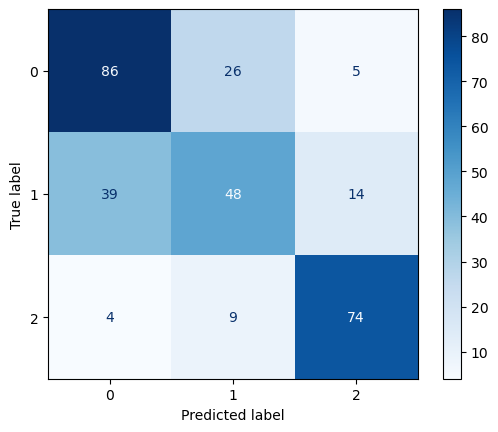

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import collections

cm = confusion_matrix(test_y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

Wide Network

In [36]:
import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

2023-04-13 16:23:34.638362: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [37]:
from tensorflow import keras

# fix random seed for reproducibility
tf.random.set_seed(1)

In [38]:
from keras import backend as K


def recall(y_true, y_pred):
    y_true = K.ones_like(y_true)
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall_keras = true_positives / (possible_positives + K.epsilon())
    return recall_keras

In [39]:
%%time

# create model stucture
model = keras.models.Sequential()
model.add(keras.layers.Input(6))
model.add(keras.layers.Dense(250, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax')) # final layer, 3 categories as there are only 3 classes to predict


# compile
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=[recall])

# if you want to overide the defaults for the optimizer....
#adam = keras.optimizers.Adam(learning_rate=0.01)
#model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])


CPU times: user 102 ms, sys: 21.8 ms, total: 124 ms
Wall time: 133 ms


In [40]:
%%time

# fit the model
history = model.fit(train_X, train_y, 
                    validation_data=(test_X, test_y), 
                    epochs=70)


Epoch 1/70
28/28 [==============================] - 1s 13ms/step - loss: 1.0624 - recall: 0.0246 - val_loss: 1.0411 - val_recall: 0.0586
Epoch 2/70
28/28 [==============================] - 0s 5ms/step - loss: 0.9864 - recall: 0.1417 - val_loss: 0.9877 - val_recall: 0.1368
Epoch 3/70
28/28 [==============================] - 0s 7ms/step - loss: 0.9385 - recall: 0.1782 - val_loss: 0.9497 - val_recall: 0.1708
Epoch 4/70
28/28 [==============================] - 0s 5ms/step - loss: 0.9041 - recall: 0.2210 - val_loss: 0.9239 - val_recall: 0.2548
Epoch 5/70
28/28 [==============================] - 0s 7ms/step - loss: 0.8797 - recall: 0.2612 - val_loss: 0.9039 - val_recall: 0.2860
Epoch 6/70
28/28 [==============================] - 0s 6ms/step - loss: 0.8606 - recall: 0.2991 - val_loss: 0.8866 - val_recall: 0.3603
Epoch 7/70
28/28 [==============================] - 0s 5ms/step - loss: 0.8445 - recall: 0.3337 - val_loss: 0.8726 - val_recall: 0.3697
Epoch 8/70
28/28 [=============================

Epoch 61/70
28/28 [==============================] - 0s 7ms/step - loss: 0.6642 - recall: 0.7545 - val_loss: 0.7186 - val_recall: 0.7175
Epoch 62/70
28/28 [==============================] - 0s 4ms/step - loss: 0.6633 - recall: 0.7362 - val_loss: 0.7171 - val_recall: 0.7143
Epoch 63/70
28/28 [==============================] - 0s 4ms/step - loss: 0.6618 - recall: 0.7578 - val_loss: 0.7159 - val_recall: 0.7237
Epoch 64/70
28/28 [==============================] - 0s 4ms/step - loss: 0.6605 - recall: 0.7533 - val_loss: 0.7140 - val_recall: 0.7178
Epoch 65/70
28/28 [==============================] - 0s 4ms/step - loss: 0.6595 - recall: 0.7403 - val_loss: 0.7148 - val_recall: 0.7175
Epoch 66/70
28/28 [==============================] - 0s 4ms/step - loss: 0.6587 - recall: 0.7500 - val_loss: 0.7134 - val_recall: 0.7237
Epoch 67/70
28/28 [==============================] - 0s 4ms/step - loss: 0.6573 - recall: 0.7437 - val_loss: 0.7125 - val_recall: 0.7331
Epoch 68/70
28/28 [======================

In [41]:
# evaluate the model

scores = model.evaluate(test_X, test_y, verbose=0)
scores
# In results, first is loss, second is recall

[0.7104198336601257, 0.7549632787704468]

In [42]:
# let's format this into a better output...

print("%s: %.2f" % (model.metrics_names[0], scores[0]))
print("%s: %.2f" % (model.metrics_names[1], scores[1]))


loss: 0.71
recall: 0.75


[(0, 117), (1, 101), (2, 87)]
10/10 [==============================] - 0s 2ms/step


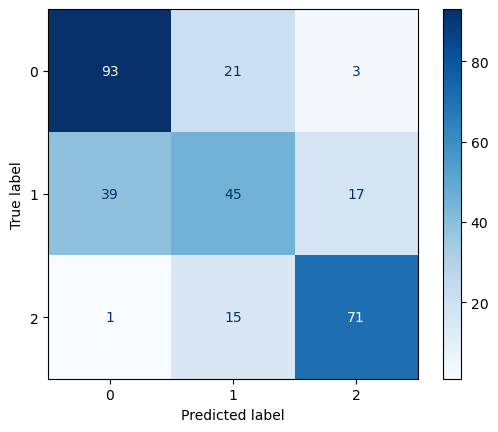

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# for reference, list the frequency of each digit found in the y_test data
print(sorted(collections.Counter(test_y).items(), key=lambda i: i[0]))
      
# display the confusion matrix
cm = confusion_matrix(test_y, model.predict(test_X).argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

From the above plot we can see the number of correct and incorrect predictions by the model.For Class 0, 93 has been predicted correctly whereas 39 are predicted as 1 and 1 as 2.

Considering Recall as the metric to decide the best model, the wide network using Keras performed better than the MLPClassifier out of all the above models that were fit on the dataset. Wide NN using Keras has a Recall value of
0.75.

Deep Network

In [44]:
#Define the model: for multi-class

model = keras.models.Sequential()

model.add(keras.layers.Input(shape=6))
model.add(keras.layers.Dense(200, activation='relu'))
model.add(keras.layers.Dense(200, activation='relu'))
model.add(keras.layers.Dense(200, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

In [45]:
# Compile model

#Optimizer:
adam = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=[recall])

In [46]:
# Fit the model

history = model.fit(train_X, train_y, 
                    validation_data=(test_X, test_y), 
                    epochs=50)

Epoch 1/50
28/28 [==============================] - 1s 18ms/step - loss: 1.0641 - recall: 0.0022 - val_loss: 1.0310 - val_recall: 0.0309
Epoch 2/50
28/28 [==============================] - 0s 6ms/step - loss: 1.0087 - recall: 0.0770 - val_loss: 0.9901 - val_recall: 0.1055
Epoch 3/50
28/28 [==============================] - 0s 6ms/step - loss: 0.9652 - recall: 0.1469 - val_loss: 0.9541 - val_recall: 0.1958
Epoch 4/50
28/28 [==============================] - 0s 7ms/step - loss: 0.9272 - recall: 0.2266 - val_loss: 0.9237 - val_recall: 0.2520
Epoch 5/50
28/28 [==============================] - 0s 8ms/step - loss: 0.8962 - recall: 0.2623 - val_loss: 0.8988 - val_recall: 0.2892
Epoch 6/50
28/28 [==============================] - 0s 8ms/step - loss: 0.8699 - recall: 0.3032 - val_loss: 0.8754 - val_recall: 0.3482
Epoch 7/50
28/28 [==============================] - 0s 6ms/step - loss: 0.8470 - recall: 0.3534 - val_loss: 0.8559 - val_recall: 0.3884
Epoch 8/50
28/28 [=============================

In [47]:
# evaluate the model

scores = model.evaluate(test_X, test_y, verbose=0)
scores

# In results, first is loss, second is recall

[0.6726793050765991, 0.8323529362678528]

In [48]:
# let's format this into a better output...

print("%s: %.2f" % (model.metrics_names[0], scores[0]))
print("%s: %.2f" % (model.metrics_names[1], scores[1]))

loss: 0.67
recall: 0.83


[(0, 117), (1, 101), (2, 87)]
10/10 [==============================] - 0s 2ms/step


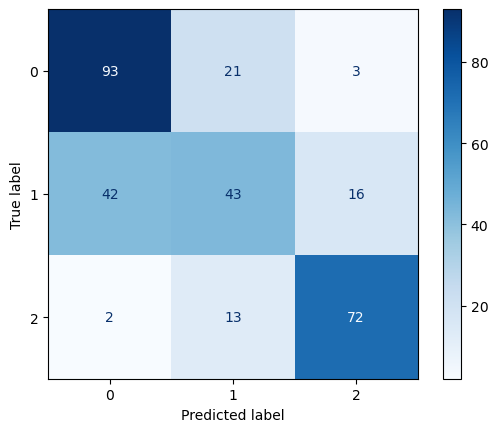

In [49]:

# for reference, list the frequency of each digit found in the y_test data
print(sorted(collections.Counter(test_y).items(), key=lambda i: i[0]))
      
# display the confusion matrix
cm = confusion_matrix(test_y, model.predict(test_X).argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

Deep Network has performed better than the models above. It has a recall value of 0.83.

RandomSearch

In [50]:
%%time

def build_clf(meta, hidden_layer_sizes, dropout):
    n_features_in_ = meta["n_features_in_"]
    n_classes_ = meta["n_classes_"]
    target_encoder_ = meta["target_encoder_"]
    
    model = tf.keras.models.Sequential()
    model.add(keras.layers.Input(shape=n_features_in_)),
    #for hidden_layer_size in hidden_layer_sizes:
    for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(hidden_layer_size, 
            kernel_initializer= tf.keras.initializers.GlorotUniform(), 
            bias_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None), 
            activation="relu"))
        model.add(keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.Dense(3, activation='softmax'))

    return model


CPU times: user 9 µs, sys: 2 µs, total: 11 µs
Wall time: 16 µs


In [53]:
%%time
from scikeras.wrappers import KerasClassifier

keras_clf = KerasClassifier(
    model=build_clf,
    hidden_layer_sizes=64,
    dropout=0.5,
    optimizer=keras.optimizers.Adam,
    optimizer__learning_rate=0.0001
)
keras_clf.get_params()


CPU times: user 27.6 ms, sys: 20.1 ms, total: 47.7 ms
Wall time: 65.1 ms


{'model': <function __main__.build_clf(meta, hidden_layer_sizes, dropout)>,
 'build_fn': None,
 'warm_start': False,
 'random_state': None,
 'optimizer': keras.optimizers.adam.Adam,
 'loss': None,
 'metrics': None,
 'batch_size': None,
 'validation_batch_size': None,
 'verbose': 1,
 'callbacks': None,
 'validation_split': 0.0,
 'shuffle': True,
 'run_eagerly': False,
 'epochs': 1,
 'hidden_layer_sizes': 64,
 'dropout': 0.5,
 'optimizer__learning_rate': 0.0001,
 'class_weight': None}

In [54]:
%%time

params = {
    
    'model__hidden_layer_sizes': [(70,),(90, ), (100,), (100, 90)], 
    'model__dropout': [0, 0.1], 
    
    'batch_size':[20, 60, 100],
    'epochs':[10],
    'optimizer':['adam','sgd'],
    'loss':['sparse_categorical_crossentropy'], 
    'optimizer__learning_rate': [0.0001, 0.001, 0.01]

}
keras_clf.get_params()

CPU times: user 70 µs, sys: 1 µs, total: 71 µs
Wall time: 76.8 µs


{'model': <function __main__.build_clf(meta, hidden_layer_sizes, dropout)>,
 'build_fn': None,
 'warm_start': False,
 'random_state': None,
 'optimizer': keras.optimizers.adam.Adam,
 'loss': None,
 'metrics': None,
 'batch_size': None,
 'validation_batch_size': None,
 'verbose': 1,
 'callbacks': None,
 'validation_split': 0.0,
 'shuffle': True,
 'run_eagerly': False,
 'epochs': 1,
 'hidden_layer_sizes': 64,
 'dropout': 0.5,
 'optimizer__learning_rate': 0.0001,
 'class_weight': None}

Since this is a multi-class problem, the scoring has to be recall_micro

In [55]:
%%time

from sklearn.model_selection import RandomizedSearchCV
#from tensorflow.keras.callbacks import EarlyStopping

rnd_search_cv = RandomizedSearchCV(
    estimator=keras_clf, 
    param_distributions=params, 
    scoring='recall_micro',  
    n_iter=50, 
    cv=3)


_ = rnd_search_cv.fit(train_X, train_y,  verbose=1)

# You can create 'call back' functions. These are functions that will be called at the 
# end of each epoch. There are a number of builtin functions created for this purpose, 
# one of which is EarlyStopping -- that, based on the parameters you give, will stop
# the training process. This is useful when the algorithm is not making any significant
# gains through further training. 
#earlystop = EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')
#callback = [earlystop]
#_ = rnd_search_cv.fit(X_train, y_train, callbacks=callback, verbose=0)


Epoch 1/10
10/10 [==============================] - 1s 4ms/step - loss: 1.1599
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: 1.1654
Epoch 3/10
10/10 [==============================] - 0s 5ms/step - loss: 1.1655
Epoch 4/10
10/10 [==============================] - 0s 4ms/step - loss: 1.1647
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 1.1570
Epoch 6/10
10/10 [==============================] - 0s 4ms/step - loss: 1.1620
Epoch 7/10
10/10 [==============================] - 0s 5ms/step - loss: 1.1576
Epoch 8/10
10/10 [==============================] - 0s 5ms/step - loss: 1.1604
Epoch 9/10
10/10 [==============================] - 0s 4ms/step - loss: 1.1559
Epoch 10/10
5/5 [==============================] - 0s 2ms/step
Epoch 1/10
10/10 [==============================] - 0s 3ms/step - loss: 1.1064
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: 1.1067
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - lo

5/5 [==============================] - 0s 2ms/step
Epoch 1/10
29/29 [==============================] - 0s 2ms/step - loss: 1.1198
Epoch 2/10
29/29 [==============================] - 0s 2ms/step - loss: 1.0431
Epoch 3/10
29/29 [==============================] - 0s 2ms/step - loss: 0.9930
Epoch 4/10
29/29 [==============================] - 0s 2ms/step - loss: 0.9556
Epoch 5/10
29/29 [==============================] - 0s 2ms/step - loss: 0.9265
Epoch 6/10
29/29 [==============================] - 0s 2ms/step - loss: 0.9023
Epoch 7/10
29/29 [==============================] - 0s 2ms/step - loss: 0.8819
Epoch 8/10
29/29 [==============================] - 0s 2ms/step - loss: 0.8638
Epoch 9/10
29/29 [==============================] - 0s 2ms/step - loss: 0.8481
Epoch 10/10
15/15 [==============================] - 0s 2ms/step
Epoch 1/10
29/29 [==============================] - 1s 2ms/step - loss: 1.0452
Epoch 2/10
29/29 [==============================] - 0s 2ms/step - loss: 0.9718
Epoch 3/10
29/2

29/29 [==============================] - 0s 3ms/step - loss: 0.9429
Epoch 9/10
29/29 [==============================] - 0s 3ms/step - loss: 0.9317
Epoch 10/10
15/15 [==============================] - 0s 2ms/step
Epoch 1/10
29/29 [==============================] - 1s 2ms/step - loss: 1.1242
Epoch 2/10
29/29 [==============================] - 0s 2ms/step - loss: 1.0897
Epoch 3/10
29/29 [==============================] - 0s 2ms/step - loss: 1.0592
Epoch 4/10
29/29 [==============================] - 0s 2ms/step - loss: 1.0318
Epoch 5/10
29/29 [==============================] - 0s 2ms/step - loss: 1.0074
Epoch 6/10
29/29 [==============================] - 0s 2ms/step - loss: 0.9851
Epoch 7/10
29/29 [==============================] - 0s 2ms/step - loss: 0.9657
Epoch 8/10
29/29 [==============================] - 0s 2ms/step - loss: 0.9477
Epoch 9/10
29/29 [==============================] - 0s 2ms/step - loss: 0.9314
Epoch 10/10
15/15 [==============================] - 0s 2ms/step
Epoch 1/10
2

5/5 [==============================] - 0s 2ms/step
Epoch 1/10
10/10 [==============================] - 0s 2ms/step - loss: 1.2054
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 1.1893
Epoch 3/10
10/10 [==============================] - 0s 2ms/step - loss: 1.1735
Epoch 4/10
10/10 [==============================] - 0s 2ms/step - loss: 1.1584
Epoch 5/10
10/10 [==============================] - 0s 2ms/step - loss: 1.1440
Epoch 6/10
10/10 [==============================] - 0s 2ms/step - loss: 1.1299
Epoch 7/10
10/10 [==============================] - 0s 2ms/step - loss: 1.1165
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 1.1036
Epoch 9/10
10/10 [==============================] - 0s 2ms/step - loss: 1.0910
Epoch 10/10
5/5 [==============================] - 0s 2ms/step
Epoch 1/10
10/10 [==============================] - 0s 2ms/step - loss: 1.0849
Epoch 2/10
10/10 [==============================] - 0s 2ms/step - loss: 1.0756
Epoch 3/10
10/10 

29/29 [==============================] - 0s 2ms/step - loss: 0.8061
Epoch 9/10
29/29 [==============================] - 0s 3ms/step - loss: 0.7940
Epoch 10/10
15/15 [==============================] - 0s 2ms/step
Epoch 1/10
29/29 [==============================] - 1s 2ms/step - loss: 1.0598
Epoch 2/10
29/29 [==============================] - 0s 3ms/step - loss: 0.9984
Epoch 3/10
29/29 [==============================] - 0s 3ms/step - loss: 0.9636
Epoch 4/10
29/29 [==============================] - 0s 2ms/step - loss: 0.9292
Epoch 5/10
29/29 [==============================] - 0s 2ms/step - loss: 0.9020
Epoch 6/10
29/29 [==============================] - 0s 2ms/step - loss: 0.8811
Epoch 7/10
29/29 [==============================] - 0s 3ms/step - loss: 0.8679
Epoch 8/10
29/29 [==============================] - 0s 3ms/step - loss: 0.8417
Epoch 9/10
29/29 [==============================] - 0s 3ms/step - loss: 0.8303
Epoch 10/10
15/15 [==============================] - 0s 2ms/step
Epoch 1/10
1

10/10 [==============================] - 0s 2ms/step - loss: 1.0323
Epoch 6/10
10/10 [==============================] - 0s 2ms/step - loss: 1.0252
Epoch 7/10
10/10 [==============================] - 0s 2ms/step - loss: 1.0188
Epoch 8/10
10/10 [==============================] - 0s 2ms/step - loss: 1.0123
Epoch 9/10
10/10 [==============================] - 0s 2ms/step - loss: 1.0061
Epoch 10/10
5/5 [==============================] - 0s 2ms/step
Epoch 1/10
6/6 [==============================] - 0s 3ms/step - loss: 1.1197
Epoch 2/10
6/6 [==============================] - 0s 3ms/step - loss: 1.1180
Epoch 3/10
6/6 [==============================] - 0s 2ms/step - loss: 1.1162
Epoch 4/10
6/6 [==============================] - 0s 3ms/step - loss: 1.1145
Epoch 5/10
6/6 [==============================] - 0s 2ms/step - loss: 1.1128
Epoch 6/10
6/6 [==============================] - 0s 3ms/step - loss: 1.1111
Epoch 7/10
6/6 [==============================] - 0s 3ms/step - loss: 1.1095
Epoch 8/10
6/6

29/29 [==============================] - 0s 2ms/step - loss: 0.8708
Epoch 4/10
29/29 [==============================] - 0s 2ms/step - loss: 0.8356
Epoch 5/10
29/29 [==============================] - 0s 2ms/step - loss: 0.7982
Epoch 6/10
29/29 [==============================] - 0s 2ms/step - loss: 0.7682
Epoch 7/10
29/29 [==============================] - 0s 2ms/step - loss: 0.7570
Epoch 8/10
29/29 [==============================] - 0s 2ms/step - loss: 0.7443
Epoch 9/10
29/29 [==============================] - 0s 3ms/step - loss: 0.7350
Epoch 10/10
15/15 [==============================] - 0s 2ms/step
Epoch 1/10
29/29 [==============================] - 1s 2ms/step - loss: 1.0593
Epoch 2/10
29/29 [==============================] - 0s 2ms/step - loss: 0.9014
Epoch 3/10
29/29 [==============================] - 0s 2ms/step - loss: 0.8219
Epoch 4/10
29/29 [==============================] - 0s 2ms/step - loss: 0.7704
Epoch 5/10
29/29 [==============================] - 0s 2ms/step - loss: 0.739

3/3 [==============================] - 0s 4ms/step
Epoch 1/10
6/6 [==============================] - 0s 4ms/step - loss: 1.2373
Epoch 2/10
6/6 [==============================] - 0s 5ms/step - loss: 1.2419
Epoch 3/10
6/6 [==============================] - 0s 4ms/step - loss: 1.2284
Epoch 4/10
6/6 [==============================] - 0s 4ms/step - loss: 1.2337
Epoch 5/10
6/6 [==============================] - 0s 4ms/step - loss: 1.2275
Epoch 6/10
6/6 [==============================] - 0s 4ms/step - loss: 1.2134
Epoch 7/10
6/6 [==============================] - 0s 6ms/step - loss: 1.2145
Epoch 8/10
6/6 [==============================] - 0s 6ms/step - loss: 1.2123
Epoch 9/10
6/6 [==============================] - 0s 6ms/step - loss: 1.2039
Epoch 10/10
3/3 [==============================] - 0s 3ms/step
Epoch 1/10
6/6 [==============================] - 1s 5ms/step - loss: 1.0501
Epoch 2/10
6/6 [==============================] - 0s 7ms/step - loss: 1.0457
Epoch 3/10
6/6 [=======================

10/10 [==============================] - 0s 4ms/step - loss: 1.0387
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0383
Epoch 10/10
5/5 [==============================] - 0s 2ms/step
Epoch 1/10
10/10 [==============================] - 0s 2ms/step - loss: 1.1933
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 1.1927
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 1.1920
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 1.1914
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 1.1907
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 1.1901
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 1.1894
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 1.1888
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 1.1881
Epoch 10/10
5/5 [==============================] - 0s 13ms/step
Epoch 1/10
29/2

6/6 [==============================] - 0s 3ms/step - loss: 1.0307
Epoch 6/10
6/6 [==============================] - 0s 3ms/step - loss: 1.0201
Epoch 7/10
6/6 [==============================] - 0s 3ms/step - loss: 1.0101
Epoch 8/10
6/6 [==============================] - 0s 3ms/step - loss: 1.0007
Epoch 9/10
6/6 [==============================] - 0s 3ms/step - loss: 0.9918
Epoch 10/10
3/3 [==============================] - 0s 3ms/step
Epoch 1/10
10/10 [==============================] - 0s 2ms/step - loss: 1.1360
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 1.1357
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 1.1354
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 1.1351
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 1.1348
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 1.1345
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 1.1342
Epoch 8/10

6/6 [==============================] - 0s 4ms/step - loss: 1.0685
Epoch 4/10
6/6 [==============================] - 0s 4ms/step - loss: 1.0683
Epoch 5/10
6/6 [==============================] - 0s 3ms/step - loss: 1.0681
Epoch 6/10
6/6 [==============================] - 0s 3ms/step - loss: 1.0679
Epoch 7/10
6/6 [==============================] - 0s 4ms/step - loss: 1.0677
Epoch 8/10
6/6 [==============================] - 0s 3ms/step - loss: 1.0675
Epoch 9/10
6/6 [==============================] - 0s 3ms/step - loss: 1.0673
Epoch 10/10
3/3 [==============================] - 0s 3ms/step
Epoch 1/10
6/6 [==============================] - 0s 3ms/step - loss: 1.1808
Epoch 2/10
6/6 [==============================] - 0s 3ms/step - loss: 1.1803
Epoch 3/10
6/6 [==============================] - 0s 3ms/step - loss: 1.1798
Epoch 4/10
6/6 [==============================] - 0s 4ms/step - loss: 1.1793
Epoch 5/10
6/6 [==============================] - 0s 3ms/step - loss: 1.1788
Epoch 6/10
6/6 [========

10/10 [==============================] - 2s 2ms/step - loss: 1.1092
Epoch 2/10
10/10 [==============================] - 0s 2ms/step - loss: 1.0187
Epoch 3/10
10/10 [==============================] - 0s 2ms/step - loss: 0.9458
Epoch 4/10
10/10 [==============================] - 0s 2ms/step - loss: 0.8981
Epoch 5/10
10/10 [==============================] - 0s 2ms/step - loss: 0.8668
Epoch 6/10
10/10 [==============================] - 0s 2ms/step - loss: 0.8368
Epoch 7/10
10/10 [==============================] - 0s 2ms/step - loss: 0.8113
Epoch 8/10
10/10 [==============================] - 0s 2ms/step - loss: 0.7912
Epoch 9/10
10/10 [==============================] - 0s 2ms/step - loss: 0.7752
Epoch 10/10
5/5 [==============================] - 0s 2ms/step
Epoch 1/10
10/10 [==============================] - 1s 2ms/step - loss: 1.0671
Epoch 2/10
10/10 [==============================] - 0s 2ms/step - loss: 0.9941
Epoch 3/10
10/10 [==============================] - 0s 2ms/step - loss: 0.9526


3/3 [==============================] - 0s 3ms/step
Epoch 1/10
6/6 [==============================] - 1s 3ms/step - loss: 1.1641
Epoch 2/10
6/6 [==============================] - 0s 4ms/step - loss: 1.0956
Epoch 3/10
6/6 [==============================] - 0s 3ms/step - loss: 1.0305
Epoch 4/10
6/6 [==============================] - 0s 3ms/step - loss: 0.9801
Epoch 5/10
6/6 [==============================] - 0s 4ms/step - loss: 0.9464
Epoch 6/10
6/6 [==============================] - 0s 3ms/step - loss: 0.9139
Epoch 7/10
6/6 [==============================] - 0s 4ms/step - loss: 0.8879
Epoch 8/10
6/6 [==============================] - 0s 3ms/step - loss: 0.8725
Epoch 9/10
6/6 [==============================] - 0s 3ms/step - loss: 0.8508
Epoch 10/10
3/3 [==============================] - 0s 3ms/step
Epoch 1/10
6/6 [==============================] - 0s 3ms/step - loss: 1.2046
Epoch 2/10
6/6 [==============================] - 0s 3ms/step - loss: 1.1707
Epoch 3/10
6/6 [=======================

10/10 [==============================] - 0s 3ms/step - loss: 0.6903
Epoch 10/10
5/5 [==============================] - 0s 2ms/step
Epoch 1/10
29/29 [==============================] - 0s 2ms/step - loss: 1.1027
Epoch 2/10
29/29 [==============================] - 0s 2ms/step - loss: 1.0893
Epoch 3/10
29/29 [==============================] - 0s 2ms/step - loss: 1.0806
Epoch 4/10
29/29 [==============================] - 0s 2ms/step - loss: 1.0685
Epoch 5/10
29/29 [==============================] - 0s 2ms/step - loss: 1.0652
Epoch 6/10
29/29 [==============================] - 0s 3ms/step - loss: 1.0563
Epoch 7/10
29/29 [==============================] - 0s 2ms/step - loss: 1.0428
Epoch 8/10
29/29 [==============================] - 0s 2ms/step - loss: 1.0448
Epoch 9/10
29/29 [==============================] - 0s 2ms/step - loss: 1.0288
Epoch 10/10
15/15 [==============================] - 0s 2ms/step
Epoch 1/10
29/29 [==============================] - 0s 2ms/step - loss: 1.1482
Epoch 2/10
29/

6/6 [==============================] - 0s 4ms/step - loss: 0.8701
Epoch 7/10
6/6 [==============================] - 0s 5ms/step - loss: 0.8540
Epoch 8/10
6/6 [==============================] - 0s 4ms/step - loss: 0.8409
Epoch 9/10
6/6 [==============================] - 0s 4ms/step - loss: 0.8289
Epoch 10/10
3/3 [==============================] - 0s 3ms/step
Epoch 1/10
6/6 [==============================] - 1s 3ms/step - loss: 1.0343
Epoch 2/10
6/6 [==============================] - 0s 4ms/step - loss: 0.9757
Epoch 3/10
6/6 [==============================] - 0s 4ms/step - loss: 0.9198
Epoch 4/10
6/6 [==============================] - 0s 4ms/step - loss: 0.8922
Epoch 5/10
6/6 [==============================] - 0s 4ms/step - loss: 0.8591
Epoch 6/10
6/6 [==============================] - 0s 4ms/step - loss: 0.8310
Epoch 7/10
6/6 [==============================] - 0s 3ms/step - loss: 0.8150
Epoch 8/10
6/6 [==============================] - 0s 3ms/step - loss: 0.7931
Epoch 9/10
6/6 [========

29/29 [==============================] - 0s 3ms/step - loss: 0.7676
Epoch 5/10
29/29 [==============================] - 0s 3ms/step - loss: 0.7370
Epoch 6/10
29/29 [==============================] - 0s 3ms/step - loss: 0.7148
Epoch 7/10
29/29 [==============================] - 0s 3ms/step - loss: 0.6982
Epoch 8/10
29/29 [==============================] - 0s 3ms/step - loss: 0.6827
Epoch 9/10
29/29 [==============================] - 0s 3ms/step - loss: 0.6684
Epoch 10/10
15/15 [==============================] - 0s 2ms/step
Epoch 1/10
29/29 [==============================] - 1s 3ms/step - loss: 1.0044
Epoch 2/10
29/29 [==============================] - 0s 3ms/step - loss: 0.9021
Epoch 3/10
29/29 [==============================] - 0s 2ms/step - loss: 0.8472
Epoch 4/10
29/29 [==============================] - 0s 3ms/step - loss: 0.8097
Epoch 5/10
29/29 [==============================] - 0s 3ms/step - loss: 0.7822
Epoch 6/10
29/29 [==============================] - 0s 3ms/step - loss: 0.761

In [56]:
rnd_search_cv.best_params_

{'optimizer__learning_rate': 0.01,
 'optimizer': 'adam',
 'model__hidden_layer_sizes': (90,),
 'model__dropout': 0.1,
 'loss': 'sparse_categorical_crossentropy',
 'epochs': 10,
 'batch_size': 60}

In [57]:
best_net = rnd_search_cv.best_estimator_
print(rnd_search_cv.best_params_)

{'optimizer__learning_rate': 0.01, 'optimizer': 'adam', 'model__hidden_layer_sizes': (90,), 'model__dropout': 0.1, 'loss': 'sparse_categorical_crossentropy', 'epochs': 10, 'batch_size': 60}


In [58]:
%%time
y_pred = best_net.predict(test_X)
print(classification_report(test_y, y_pred))

6/6 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.67      0.48      0.56       117
           1       0.45      0.58      0.51       101
           2       0.79      0.84      0.82        87

    accuracy                           0.62       305
   macro avg       0.64      0.63      0.63       305
weighted avg       0.64      0.62      0.62       305

CPU times: user 146 ms, sys: 11 ms, total: 157 ms
Wall time: 166 ms


[(0, 117), (1, 101), (2, 87)]
6/6 [==============================] - 0s 2ms/step


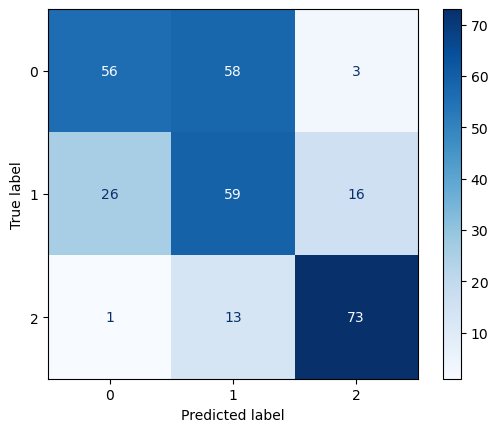

In [59]:
print(sorted(collections.Counter(test_y).items(), key=lambda i: i[0]))
      
cm = confusion_matrix(test_y, best_net.predict(test_X))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

For this multi-class problem, I have 6 input layers and 3 output layers as I have 3 categories/classes to be predicted. Accordingly I have structured the Network layers and implemented custom scores. In this case it's recall.
I have tried different combinations of optimizers and epochs to minimize the loss. Considering all the above models that are implemented on the data, Deep Network model with 3 hidden layers has fit the data better than other models. 